### Maryam Vazirabad
### Assignment 7
### 10/28/19
### Using Flowers Recognition Dataset found here:
### https://www.kaggle.com/alxmamaev/flowers-recognition
### This dataset has 5 categories of images (for each type of flower we are attempting to classify) and are about 320x240 pixels

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
import gc
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical
import cv2

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

#### Got help from these examples:
#### CNN example from class and preprocessing help with this particular dataset from 
#### https://www.kaggle.com/epiktroll/flowers-recognition-with-custom-cnn

#### Next, we unzip the files into input directory

In [2]:
import zipfile as zf
files = zf.ZipFile("flowers-recognition.zip", 'r')
files.extractall('../input')
files.close()

In [3]:
print(os.listdir("../input"))

['flowers', '.ipynb_checkpoints']


#### Resizing the images for each type of flower in the flowers folder (daisy, dandelion, rose, sunflower, and tulip). We are reducing into 32x32 images:

In [4]:
x_ = list()
y = list()
for i in os.listdir("../input/flowers/flowers/daisy"):
    try:
        path = "../input/flowers/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(32,32))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("../input/flowers/flowers/dandelion"):
    try:
        path = "../input/flowers/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(32,32))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("../input/flowers/flowers/rose"):
    try:
        path = "../input/flowers/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(32,32))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("../input/flowers/flowers/sunflower"):
    try:
        path = "../input/flowers/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(32,32))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("../input/flowers/flowers/tulip"):
    try:
        path = "../input/flowers/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(32,32))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

#### Visualizing one of all flower types in data (5 total):

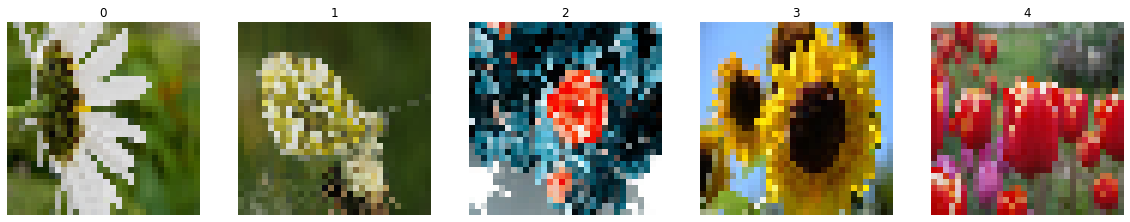

In [5]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_[950*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[950*i])

In [6]:
y = to_categorical(y,num_classes = 5)

#### Time to split test and train datasets:

In [7]:
X_train,X_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

#### Getting the shape of the X_train , y_train , X_test and y_test data:

In [8]:
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (3674, 32, 32, 3)
y_train shape: (3674, 5)
x_test shape: (649, 32, 32, 3)
y_test shape: (649, 5)


In [9]:
#Converting labels from 5 to 1
y_train[y_train == 5] = 0
y_test[y_test == 5] = 0

#### Creating the model:

In [10]:
model = models.Sequential()
#adding the first convolution layer to extract the features first
# 3x3 relu
#input shape 32,32,3
model.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)))
#Adding dropout of .2
model.add(layers.Dropout(.2))
#Create another layer without the input_shape
model.add(layers.Conv2D(32, (3,3), activation='relu'))
#Add pooling layer with a 2x2 pixel filter to get the max element from the feature maps. Reduces the 
#dimension of the feature maps by half
#error given if padding is not set to SAME
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))
#64 neurons in this layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Dropout(.2))
#64 neurons
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))
#now 128 neurons
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Dropout(.2))
#128 neurons
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

#Adding flattening layer to reduce the image to a linear array
model.add(layers.Flatten())
model.add(layers.Dropout(.2))
#1024 neurons 
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(.2))
#512 neurons
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(.2))

#Create the last layer of this neural network with 5 neurons using the softmax function
model.add(layers.Dense(5, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



#### Summarizing the model:

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)       

#### Compiling the model with specific loss function, optimizier, and accuracy metrics:

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#### Fitting the model with batch size as 256, epochs as 50, and splitting the data with 30% as validation:

In [13]:
hist = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2571 samples, validate on 1103 samples
Epoch 1/50
2571/2571 [==============================] - 9s 4ms/step - loss: 3.5896 - acc: 0.2159 - val_loss: 1.5947 - val_acc: 0.2321
Epoch 2/50
2571/2571 [==============================] - 7s 3ms/step - loss: 1.5946 - acc: 0.2482 - val_loss: 1.5108 - val_acc: 0.3182
Epoch 3/50
2571/2571 [==============================] - 7s 3ms/step - loss: 1.5185 - acc: 0.2886 - val_loss: 1.4898 - val_acc: 0.3255
Epoch 4/50
2571/2571 [==============================] - 7s 3ms/step - loss: 1.4618 - acc: 0.2952 - val_loss: 1.4088 - val_acc: 0.3218
Epoch 5/50
2571/2571 [==============================] - 7s 3ms/step - loss: 1.4118 - acc: 0.3314 - val_loss: 1.4755 - val_acc: 0.2747
Epoch 6/50
2571/2571 [==============================] - 7s 3ms/step - loss: 1.4535 - acc: 0.3162 - val_loss: 1.3881 - val_acc: 0.3590
Epoch 7/50
2571/2571 [==============================] 

#### Evaluating the model:

In [14]:
model.evaluate(X_test, y_test)

649/649 [==============================] - 1s 966us/step


[0.9502987707340846, 0.6517719571322249]

#### Plotting model accuracy to the number of epochs:

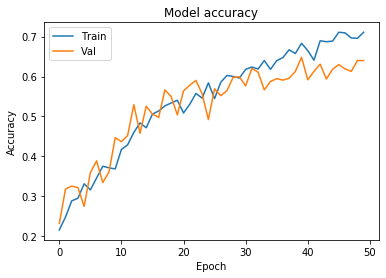

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#### Plotting the model loss to the number of epochs:

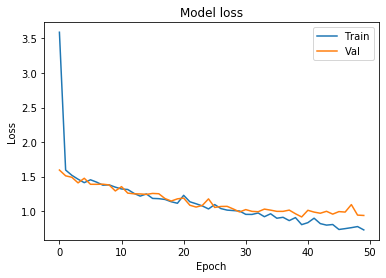

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### The model used on the flower dataset did not come out to be very accurate. After running 50 epochs, the accuracy came to be about 65.2%.The model's loss came to be around .72 after 50 epochs. The train and validation sets came to be similar values and directly related after 50 epochs as well.

#### This is not a good accuracy or loss score, which either means I have created an ineffective model for classification of these flowers, or I've done something wrong that is skewing my accuracy to be very low.
